In [2]:
import pickle
import numpy as np
import torch
from matplotlib import pyplot as plt


Load data

In [3]:
step = 210

# edge features before processed by message function
pkl_file = open(f'edge_features_unprocessed-step{step}.pkl', 'rb')
edge_features_unprocessed = np.array(pickle.load(pkl_file))
# edge feature after processed by message function
pkl_file = open(f'edge_features_processed-step{step}.pkl', 'rb')
edge_features_processed = np.array(pickle.load(pkl_file))
# connectivity indices
pkl_file = open(f'connectivity_indices-step{step}.pkl', 'rb')
connectivity_indices = pickle.load(pkl_file)
# # edge index
# pkl_file = open(f'edge_index-step{step}.pkl', 'rb')
# edge_index = pickle.load(pkl_file)

In [4]:
cut = 50
connectivity_indices = connectivity_indices[:50]
edge_features_nuprocessed = edge_features_unprocessed[:50]
edge_features_processed = edge_features_processed[:50]

In [5]:
i = 0

# get edge id connecting the same node pair (bidirectional edge)
edge_id1 = connectivity_indices[i][0][0]
edge_id2 = connectivity_indices[i][0][1]
connected_nodes = connectivity_indices[i][1].tolist()

message_unprocessed1 = edge_features_unprocessed[edge_id1]
message_unprocessed2 = edge_features_unprocessed[edge_id2]
message_processed1 = edge_features_processed[edge_id1]
message_processed2 = edge_features_processed[edge_id2]

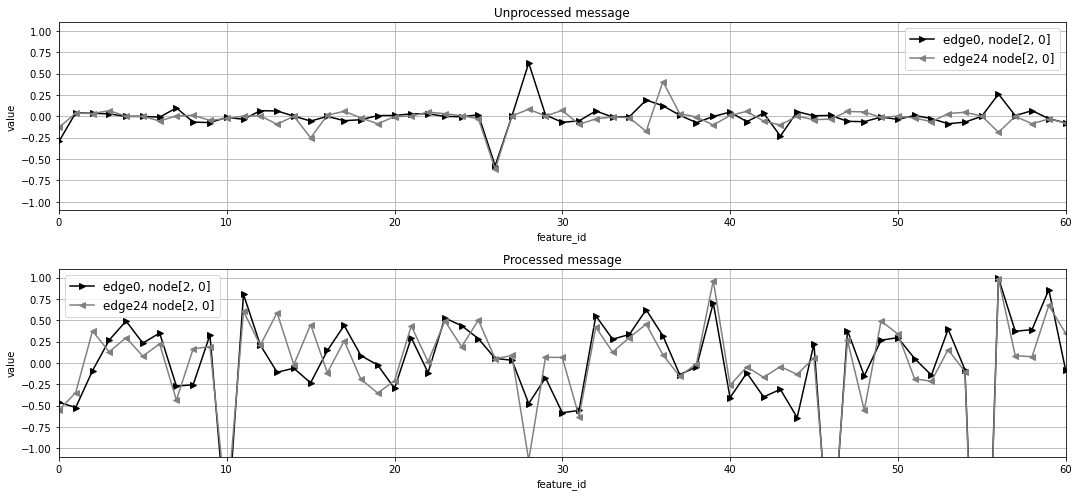

In [7]:
fig1, axes = plt.subplots(2, 1, figsize=(15, 7))
axes[0].plot(np.arange(128), message_unprocessed1,
        label=f"edge{edge_id1}, node{connected_nodes}", marker=">", color="black")
axes[0].plot(np.arange(128), message_unprocessed2,
        label=f"edge{edge_id2} node{connected_nodes}", marker="<", color="gray")
axes[1].plot(np.arange(128), message_processed1,
        label=f"edge{edge_id1}, node{connected_nodes}", marker=">", color="black")
axes[1].plot(np.arange(128), message_processed2,
        label=f"edge{edge_id2} node{connected_nodes}", marker="<", color="gray")
for ax in axes:
        ax.set_xlabel("feature_id")
        ax.set_ylabel("value")
        ax.set_xlim([0, 60])
        ax.set_ylim([-1.1, 1.1])
        ax.legend(prop={'size': 12})
        ax.grid()
axes[0].set_title("Unprocessed message")
axes[1].set_title("Processed message")
plt.tight_layout()